# Read in Data

In [20]:
!pip install tensorflow
!pip install -U scikit-learn

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sn

  Using cached https://files.pythonhosted.org/packages/68/1e/116ad560de97694e2d0c1843a7a0075cc9f49e922454d32f49a80eb6f1f2/numpy-1.14.5-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: numpy 1.15.3
    Uninstalling numpy-1.15.3:
      Successfully uninstalled numpy-1.15.3
You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already up-to-date: scikit-learn in /opt/conda/lib/python3.6/site-packages
Requirement already up-to-date: scipy>=0.13.3 in /opt/conda/lib/python3.6/site-packages (from scikit-learn)
  Using cached https://files.pythonhosted.org/packages/16/21/2e88568c134cc3c8d22af290865e2abbd86efa58a1358ffcb19b6c74f9a3/numpy-1.15.3-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: numpy 1.14.5
    Uninstalling numpy-1.14.5:
      Successfully uninstalled numpy-1.14.5
You are using pip version 9.0.3, however version 18.1 is available.
You should consider 

In [5]:
train_data = pd.read_csv(r"train_data.csv", header=None)
train_label = pd.read_csv(r"train_labels.csv", header=None, names=['label'])

# Plot distribution of music genres

In [144]:
# count the number of each label
train_label['label'].value_counts()

labels = train_label['label'].value_counts()
print(labels)

1     2178
2      618
3      326
6      260
4      253
5      214
8      195
7      141
9       92
10      86
Name: label, dtype: int64


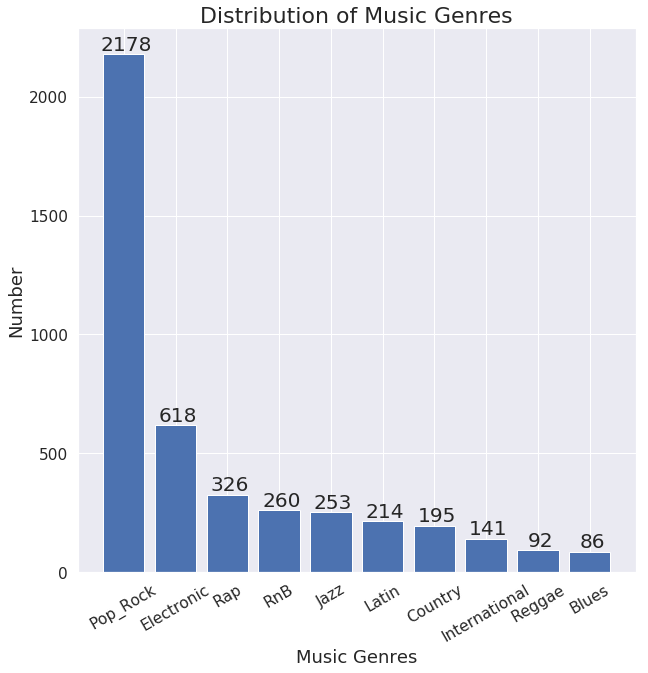

In [145]:
N = 10

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
label_count = labels.values

fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(ind, label_count)

# add some text for labels, title and axes ticks
ax.set_xlabel('Music Genres', fontsize=18)
ax.set_ylabel('Number', fontsize=18)
ax.set_title('Distribution of Music Genres', fontsize=22)
plt.xticks(np.arange(10),['Pop_Rock','Electronic','Rap','RnB','Jazz','Latin','Country','International','Reggae','Blues'], rotation=30)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/1.8, 1.00*height,
                '%d' % int(height), fontsize='large',
                ha='center', va='bottom')

autolabel(rects1)

plt.savefig("distribution of music.png")
plt.show()

In [21]:
# check the shape of the dataset
train_data.shape

(4363, 264)

In [22]:
train_set = train_data.assign(label=train_label.label)

train_set["label"] = train_set.label - 1

In [24]:
# check head of the dataset
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,255,256,257,258,259,260,261,262,263,label
0,1040.7,2315.6,2839.1,2552.2,2290.4,1913.8,2152.6,1930.3,2079.3,1706.7,...,0.36548,0.093584,0.166870,0.083426,0.118090,0.089792,0.074371,0.073162,0.059463,0
1,2309.4,4780.4,4055.7,3120.5,1979.9,2343.6,2634.2,3208.5,3078.0,3374.7,...,0.14739,0.102560,0.213040,0.082041,0.080967,0.076450,0.052523,0.052357,0.055297,0
2,2331.9,4607.0,4732.3,5007.0,3164.9,3171.9,2915.7,3282.3,2400.0,1895.2,...,0.36321,0.114200,0.223780,0.100770,0.186910,0.067270,0.061138,0.085509,0.049422,0
3,3350.9,6274.4,5037.0,4609.7,3438.8,3925.8,3746.4,3539.4,3053.7,3075.4,...,0.28950,0.074124,0.201580,0.049032,0.130210,0.045800,0.080885,0.148910,0.042027,0
4,2017.6,3351.8,2924.9,2726.3,1979.9,1930.9,2083.4,1889.2,1695.4,1911.7,...,0.38266,0.079402,0.063495,0.053717,0.086750,0.062090,0.048999,0.033159,0.070813,0


In [16]:
feature_col_names = list(range(264))

# Preprocessing Data

In [17]:
train_subset = train_set

X = train_subset[feature_col_names].values
y = train_subset.label.values

In [26]:
# Noramalize the dataset

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# Split into Train/Validation Set Using Stratefied Sampling

In [136]:
sss = StratifiedShuffleSplit(n_splits=1, # Just split once
                             test_size=0.2,
                             random_state=0)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [137]:
X_train.shape

(3490, 264)

In [138]:
X_test.shape

(873, 264)

# Method 1: Multilayer Perception (MLP)

In [139]:
layers = tf.keras.layers

model_mlp = tf.keras.models.Sequential()
model_mlp.add(layers.Dense(256, activation=tf.nn.relu, input_shape=(X_train.shape[1],)))
model_mlp.add(layers.Dropout(0.2))
model_mlp.add(layers.Dense(128, activation=tf.nn.relu))
model_mlp.add(layers.Dropout(0.2))
model_mlp.add(layers.Dense(64, activation=tf.nn.relu))
model_mlp.add(layers.Dropout(0.2))
model_mlp.add(layers.Dense(10, activation=tf.nn.softmax))

optimizer = tf.train.AdamOptimizer()

model_mlp.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [140]:
model_mlp.fit(X_train, y_train, batch_size=64, epochs=50, shuffle=True, validation_data=(X_test, y_test))


Train on 3490 samples, validate on 873 samples
Epoch 1/50
3490/3490 [==============================] - 2s 682us/step - loss: 1.6672 - acc: 0.4934 - val_loss: 1.4829 - val_acc: 0.5464
Epoch 2/50
3490/3490 [==============================] - 1s 170us/step - loss: 1.5034 - acc: 0.5301 - val_loss: 1.3867 - val_acc: 0.5670
Epoch 3/50
3490/3490 [==============================] - 1s 160us/step - loss: 1.3958 - acc: 0.5616 - val_loss: 1.3085 - val_acc: 0.5865
Epoch 4/50
3490/3490 [==============================] - 1s 157us/step - loss: 1.3548 - acc: 0.5742 - val_loss: 1.2624 - val_acc: 0.5853
Epoch 5/50
3490/3490 [==============================] - 1s 163us/step - loss: 1.3002 - acc: 0.5877 - val_loss: 1.2362 - val_acc: 0.5865
Epoch 6/50
3490/3490 [==============================] - 1s 166us/step - loss: 1.2696 - acc: 0.6000 - val_loss: 1.2432 - val_acc: 0.5991
Epoch 7/50
3490/3490 [==============================] - 1s 153us/step - loss: 1.2524 - acc: 0.6029 - val_loss: 1.2423 - val_acc: 0.6014
E

# Plot Confusion Matrix

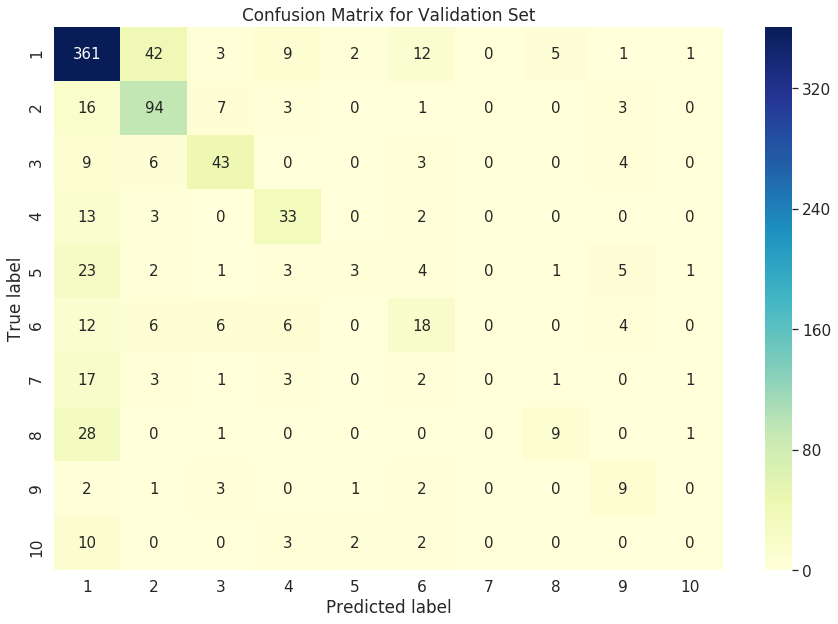

In [142]:
matrix_predictions = model_mlp.predict(X_test)
matrix_res = []
for i in range(0, 873):
    matrix_res.append(np.argmax(matrix_predictions[i]))

array = confusion_matrix(y_test, matrix_res)

df_cm = pd.DataFrame(array, range(1,11), range(1,11))
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4)#for label size
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, cmap="YlGnBu", fmt="d")# font size
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title("Confusion Matrix for Validation Set")

plt.savefig("confusion matrix.png")

# Make predictions and save accuracy result to txt file

In [38]:
test_data=pd.read_csv('test_data.csv',header=None)
test_data = test_data.values
test = min_max_scaler.fit_transform(test_data)
predictions = model_mlp.predict(test)
res = []
for i in range(0, 6544):
    res.append(np.argmax(predictions[i])+1)
# print(predictions[40])

submission = np.column_stack((np.arange(1,6545), np.array(res)))

solution = np.savetxt("solution_mlp.csv", submission, delimiter=',',fmt=['%i','%i'], header="Sample_id,Sample_label", comments='')

# Make predictions and save log-loss result to txt file

In [39]:
test_data=pd.read_csv('test_data.csv',header=None)
test_data = test_data.values
test = min_max_scaler.fit_transform(test_data)
predictions = model_mlp.predict(test)

submission_log = np.column_stack((np.arange(1,6545), predictions))

solution = np.savetxt("solution_mlp_logloss.csv", submission_log, delimiter=',',fmt=['%d','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f'], header="Sample_id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Class_10", comments='')

# Method 2: Convolutional Neural Networks (CNN)

In [41]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras import backend as K

batch_size = 64
num_classes = 10
epochs = 61

x_train, x_test = X_train, X_test

x_train_new = x_train.reshape(x_train.shape[0], 12, 22).astype('float32')
x_test_new = x_test.reshape(x_test.shape[0], 12, 22).astype('float32') 

y_train_new = keras.utils.to_categorical(y_train, num_classes)
y_test_new = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, input_shape=(12, 22)))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train_new, y_train_new,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_new, y_test_new))

Train on 3490 samples, validate on 873 samples
Epoch 1/61
3490/3490 [==============================] - 2s 560us/step - loss: 1.6846 - acc: 0.4926 - val_loss: 1.5765 - val_acc: 0.5212
Epoch 2/61
3490/3490 [==============================] - 1s 322us/step - loss: 1.5410 - acc: 0.5132 - val_loss: 1.4494 - val_acc: 0.5430
Epoch 3/61
3490/3490 [==============================] - 1s 353us/step - loss: 1.4497 - acc: 0.5375 - val_loss: 1.4043 - val_acc: 0.5578
Epoch 4/61
3490/3490 [==============================] - 1s 343us/step - loss: 1.3881 - acc: 0.5484 - val_loss: 1.3443 - val_acc: 0.5693
Epoch 5/61
3490/3490 [==============================] - 1s 333us/step - loss: 1.3496 - acc: 0.5636 - val_loss: 1.3658 - val_acc: 0.5613
Epoch 6/61
3490/3490 [==============================] - 1s 330us/step - loss: 1.3262 - acc: 0.5802 - val_loss: 1.3264 - val_acc: 0.5785
Epoch 7/61
3490/3490 [==============================] - 1s 338us/step - loss: 1.2953 - acc: 0.5771 - val_loss: 1.3086 - val_acc: 0.5727
E

# Make predictions and save accuracy result to txt file

In [64]:
test_data=pd.read_csv('test_data.csv',header=None)
test_data = test_data.values
test = min_max_scaler.fit_transform(test_data)
test_data_new = test.reshape(test.shape[0], 12, 22).astype('float32') 
predictions = model.predict(test_data_new)
res = []
for i in range(0, 6544):
    res.append(np.argmax(predictions[i])+1)

submission = np.column_stack((np.arange(1,6545), np.array(res)))

solution = np.savetxt("solution_cnn.csv", submission, delimiter=',',fmt=['%i','%i'], header="Sample_id,Sample_label", comments='')

# Make predictions and save log-loss result to txt file

In [45]:
test_data=pd.read_csv('test_data.csv',header=None)
test_data = test_data.values
test = min_max_scaler.fit_transform(test_data)
test_data_new = test.reshape(test.shape[0], 12, 22).astype('float32') 
predictions = model.predict(test_data_new)

submission_log = np.column_stack((np.arange(1,6545), predictions))

solution = np.savetxt("solution_cnn_logloss.csv", submission_log, delimiter=',',fmt=['%d','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f','%1.4f'], header="Sample_id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Class_10", comments='')